# PlayGround Series - Introvert v/s Extrovert

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('../playground-series-s5e7/train.csv')
test=pd.read_csv('../playground-series-s5e7/test.csv')
submission_sample=pd.read_csv('../playground-series-s5e7/sample_submission.csv')

In [57]:
df.drop(columns=['id'],inplace=True)

In [58]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [60]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


<Axes: ylabel='Post_frequency'>

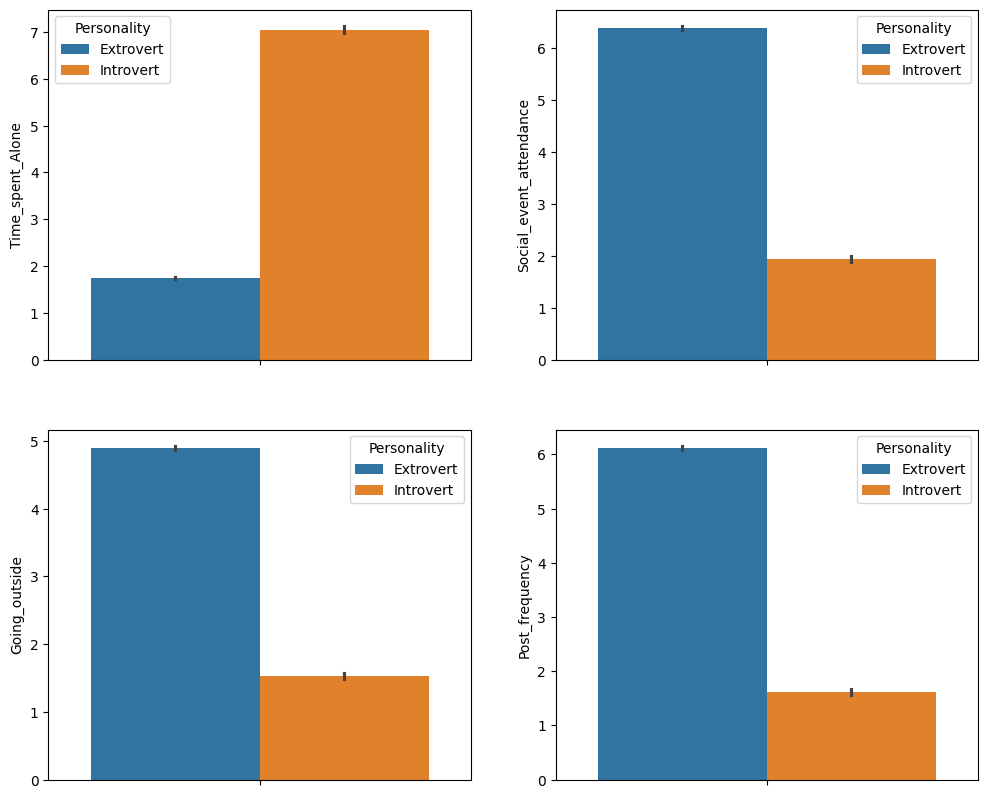

In [61]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.barplot(y=df.Time_spent_Alone,data=df,hue=df.Personality)
plt.subplot(222)
sns.barplot(y=df.Social_event_attendance,data=df,hue=df.Personality)
plt.subplot(223)
sns.barplot(y=df.Going_outside,data=df,hue=df.Personality)
plt.subplot(224)
sns.barplot(y=df.Post_frequency,data=df,hue=df.Personality)

<Axes: xlabel='Post_frequency'>

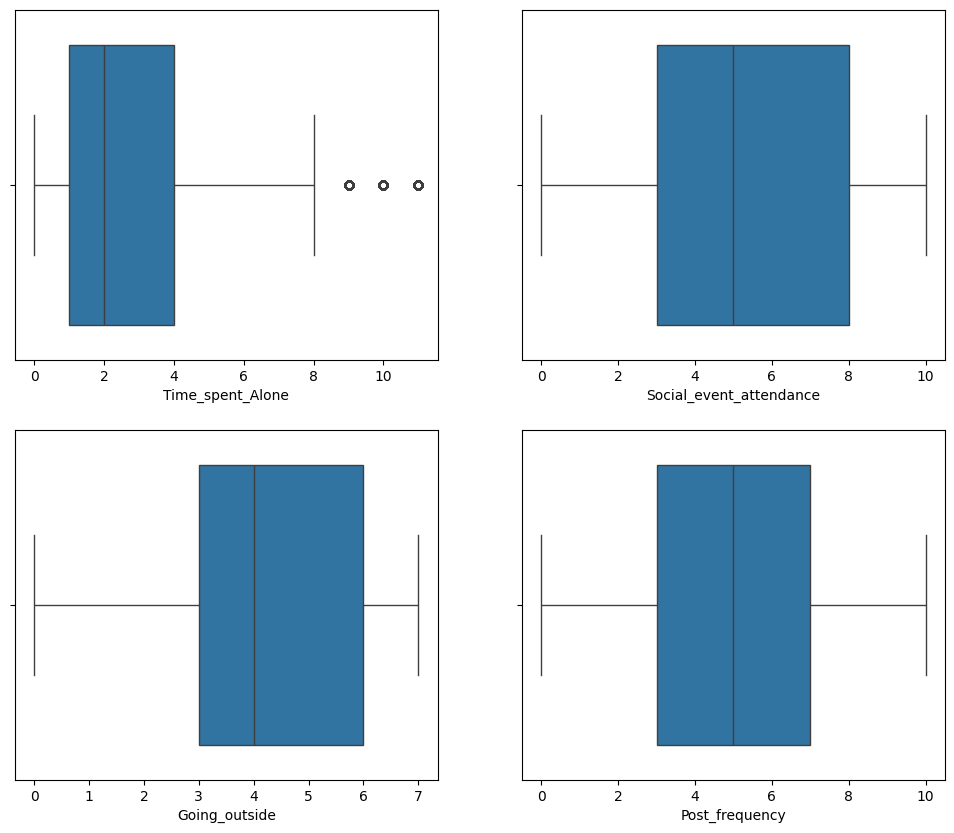

In [62]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.boxplot(x=df.Time_spent_Alone,data=df)
plt.subplot(222)
sns.boxplot(x=df.Social_event_attendance,data=df)
plt.subplot(223)
sns.boxplot(x=df.Going_outside,data=df)
plt.subplot(224)
sns.boxplot(x=df.Post_frequency,data=df)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [64]:
x=df.drop(columns=['Personality'])
y=df.Personality

In [65]:
y.sample(5)

12877    Extrovert
6602     Extrovert
10398    Introvert
4171     Introvert
2752     Introvert
Name: Personality, dtype: object

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_train.sample(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
13853,4.0,Yes,0.0,3.0,Yes,5.0,2.0
6325,2.0,No,7.0,3.0,No,NaN,3.0
13725,4.0,Yes,0.0,2.0,Yes,7.0,0.0
12301,0.0,No,4.0,5.0,No,12.0,5.0
11814,3.0,No,6.0,3.0,No,10.0,NaN


In [68]:
#numerical transform

time_spent_alone_trf=(
    'time_spent_alone',Pipeline([
        ('impute',SimpleImputer()),
    ]),['Time_spent_Alone']
)
Social_event_attendance_trf=(
    'Social_event_attendance',Pipeline([
        ('impute',SimpleImputer())
    ]),['Social_event_attendance']
)
Going_outside_trf=(
    'Going_outside',Pipeline([
        ('impute',SimpleImputer())
    ]),['Going_outside']
)
Friends_circle_size_trf=(
    'Friends_circle_size',Pipeline([
        ('impute',SimpleImputer(strategy='median'))
    ]),['Friends_circle_size']
)
Post_frequency_trf=(
    'Post_frequency',Pipeline([
        ('impute',SimpleImputer())
    ]),['Post_frequency']
)

In [69]:
#Categorical Transformer

Stage_fear_trf=(
    'Stage_fear',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('Encode',OneHotEncoder(handle_unknown='ignore'))
    ]),['Stage_fear']
)
Drained_after_socializing_trf=(
    'Drained_after_socializing',Pipeline([
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('Encode',OneHotEncoder(handle_unknown='ignore'))
    ]),['Drained_after_socializing']
)

In [70]:
transformer=ColumnTransformer(transformers=[time_spent_alone_trf,Stage_fear_trf,Social_event_attendance_trf,Going_outside_trf,Friends_circle_size_trf,Post_frequency_trf,Drained_after_socializing_trf],remainder='passthrough')

In [71]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report

Logisitic Regression

In [73]:
lr=LogisticRegression()
pipe1=Pipeline([
    ('transformer',transformer),
    ('classification',lr)
])
pipe1.fit(x_train,y_train)
y_pred=pipe1.predict(x_test)
print("accuracy_score: ",accuracy_score(y_pred,y_test))
print("f1_score: ",f1_score(y_pred,y_test))
print("recall_score: ",recall_score(y_pred,y_test))

accuracy_score:  0.968421052631579
f1_score:  0.9379968203497615
recall_score:  0.946524064171123


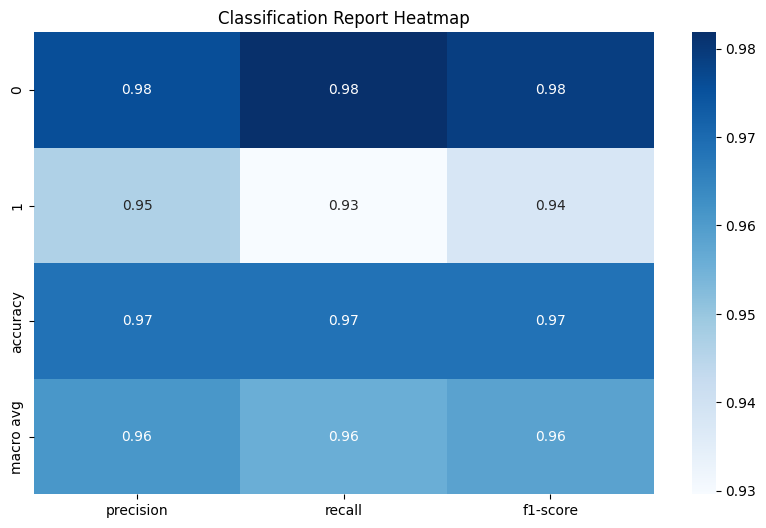

In [74]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()

RandomForestClassification

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.model_selection import GridSearchCV

n_estimators=[100,50,500,10]
max_depth=[5,7,1,3,9]
max_features=[0.2,0.5,0.25,0.75,1]
bootstrap=[True,False]
n_jobs=[1,-1]
max_samples=[0.2,0.5,0.25,0.75,1]
random_state=[12,42,9,16,5]
param_grid={
    'classifier__n_estimators': n_estimators,
    'classifier__max_depth':  max_depth,
    'classifier__max_features': max_features,
    'classifier__n_jobs': n_jobs,
    'classifier__bootstrap': bootstrap,
    'classifier__max_samples': max_samples,
    'classifier__random_state':random_state
}
pipe_grid=Pipeline([
    ('transformer',transformer),
    ('classifier',rfc)
])
grid=GridSearchCV(estimator=pipe_grid,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [77]:
rfc=RandomForestClassifier(bootstrap=True,max_depth=9,max_features=1,max_samples=0.5,n_estimators=10,n_jobs=-1,random_state=12)
pipe_final=Pipeline([
    ('transformer',transformer),
    ('Classification',rfc)
])
pipe_final.fit(x_train,y_train)
y_pred=pipe_final.predict(x_test)
print("accuracy_score: ",accuracy_score(y_pred,y_test))
print("f1_score: ",f1_score(y_pred,y_test))
print("recall_score: ",recall_score(y_pred,y_test))
print(rfc.random_state)

accuracy_score:  0.9686909581646423
f1_score:  0.9385593220338984
recall_score:  0.9465811965811965
12


In [78]:
test.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
153,18677,3.0,No,6.0,5.0,No,NaN,4.0
579,19103,0.0,No,8.0,6.0,NaN,10.0,7.0
592,19116,3.0,No,10.0,5.0,No,8.0,9.0
2046,20570,0.0,No,3.0,5.0,No,4.0,8.0
3051,21575,0.0,No,6.0,5.0,No,13.0,6.0


In [79]:
submission_sample.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [80]:
submission_sample.drop(columns=['id'],inplace=True)

In [81]:
submission_sample=le.transform(submission_sample)

c:\Users\moury\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y_prediction=pipe_final.predict(test)
accuracy_score(submission_sample,y_prediction) 

0.7475303643724697